In [261]:
VERSION = 1
n_sessions = 5
n_images_per_session = 400
target_images_dirpath = '/Users/apiccato/PycharmProjects/concentration/concentration-game-mworks/images/v%s/' % str(VERSION)

In [262]:
image_dirpath = '/Users/apiccato/lamem/images/'
train_filenames = glob.glob('/Users/apiccato/lamem/splits/train_*')
print(train_filenames)

['/Users/apiccato/lamem/splits/train_4.txt', '/Users/apiccato/lamem/splits/train_5.txt', '/Users/apiccato/lamem/splits/train_1.txt', '/Users/apiccato/lamem/splits/train_2.txt', '/Users/apiccato/lamem/splits/train_3.txt']


Aggregating memorability score across training splits

In [263]:
fn = train_filenames[2]
a = np.asarray([[x.split(' ')[0], np.float(x.split(' ')[1][:-1])] for x in open(fn).readlines() for fn in train_filenames])
df = pd.DataFrame(dict(zip(['image_name', 'mem_score'], a.transpose())))
df['mem_score'] = df['mem_score'].apply(np.float)
df = df.groupby('image_name').agg(np.mean)

Selecting images whose memorability scores falls within a certain range

In [264]:
low_mem, hi_mem = 0.7, 0.75
valid = df[df.mem_score.between(low_mem, hi_mem)]
valid.reset_index(inplace=True)

Checking out images

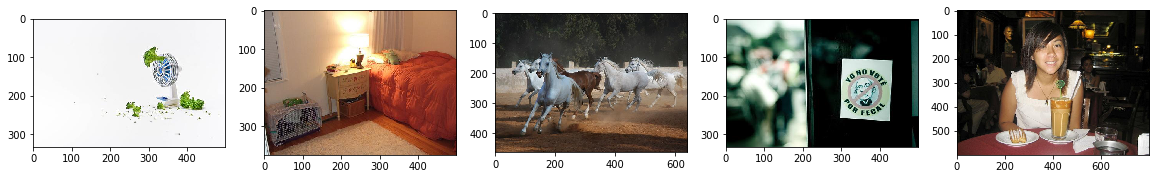

In [265]:
n_images = 5
images = np.random.choice(valid['image_name'], size=5, replace=False)
f, axs = plt.subplots(1, 5, figsize=(20, 10))
for i, ax in enumerate(axs):    
    ax.imshow(Image.open(image_dirpath + images[i]))

Creating subdirectories for each session 

In [266]:
os.mkdir(target_images_dirpath)

FileExistsError: [Errno 17] File exists: '/Users/apiccato/PycharmProjects/concentration/concentration-game-mworks/images/v1/'

In [267]:
image_names = valid['image_name'].values
np.random.seed(10)
np.random.shuffle(image_names)
image_names = image_names[0:len(image_names) - len(image_names)%n_sessions]
splits = np.split(image_names, n_sessions)

In [268]:
desired_size = 368
for session in range(n_sessions):
    print(session)
    sess_dirpath = target_images_dirpath + 'sess_%d' % session
    try:
        os.mkdir(sess_dirpath)
    except:
        shutil.rmtree(sess_dirpath)
        os.mkdir(sess_dirpath)
    np.random.seed(session)
    sess_image_filenames = splits[session][:n_images_per_session]
    for image_fn in sess_image_filenames:
        image = Image.open(image_dirpath + image_fn)
        old_size = image.size
        ratio = float(desired_size)/max(old_size)
        new_size = tuple([int(x*ratio) for x in old_size])
        image = image.resize(new_size, Image.ANTIALIAS)
        new_image = Image.new("RGB", (desired_size, desired_size))
        new_image.paste(image, ((desired_size-new_size[0])//2,
                        (desired_size-new_size[1])//2))
        new_image.save(sess_dirpath + '/'+ image_fn)

0
1
2
3
4


In [272]:
len(glob.glob(target_images_dirpath + 'sess_0/*'))

304